<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Get-bands-the-near-ir,-red,-and-thermal-tiffs-for-your-landsat-scene" data-toc-modified-id="Get-bands-the-near-ir,-red,-and-thermal-tiffs-for-your-landsat-scene-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get bands the near-ir, red, and thermal tiffs for your landsat scene</a></span></li><li><span><a href="#To-run-my-example." data-toc-modified-id="To-run-my-example.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>To run my example.</a></span><ul class="toc-item"><li><span><a href="#Preliminary-set-up:-create-my-example-folders-which-will-hold-my-tif-files" data-toc-modified-id="Preliminary-set-up:-create-my-example-folders-which-will-hold-my-tif-files-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preliminary set up: create my example folders which will hold my tif files</a></span></li><li><span><a href="#Download-all-my-example-files" data-toc-modified-id="Download-all-my-example-files-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Download all my example files</a></span></li><li><span><a href="#See-what-my--version-of-file_dict-looks-like" data-toc-modified-id="See-what-my--version-of-file_dict-looks-like-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>See what my  version of file_dict looks like</a></span></li></ul></li><li><span><a href="#Question-A:-define-your-own-version-of--file_dict" data-toc-modified-id="Question-A:-define-your-own-version-of--file_dict-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question A: define your own version of  file_dict</a></span></li><li><span><a href="#This-cell-reads-in-your-affine-transform,-metadata-and-profile" data-toc-modified-id="This-cell-reads-in-your-affine-transform,-metadata-and-profile-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>This cell reads in your affine transform, metadata and profile</a></span></li><li><span><a href="#This-cell-gets-the-right-reflection-and-radiance-functions-for-your-satellite" data-toc-modified-id="This-cell-gets-the-right-reflection-and-radiance-functions-for-your-satellite-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>This cell gets the right reflection and radiance functions for your satellite</a></span></li><li><span><a href="#Question-B:-Define-a-subscene-window-and-a-transform" data-toc-modified-id="Question-B:-Define-a-subscene-window-and-a-transform-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Question B: Define a subscene window and a transform</a></span></li><li><span><a href="#The-cell-below-calculates-the-reflectivities-for-red-and-nearir" data-toc-modified-id="The-cell-below-calculates-the-reflectivities-for-red-and-nearir-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The cell below calculates the reflectivities for red and nearir</a></span></li><li><span><a href="#Question-C:-map-your-ndvi-spring-fall-difference" data-toc-modified-id="Question-C:-map-your-ndvi-spring-fall-difference-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Question C: map your ndvi spring-fall difference</a></span></li><li><span><a href="#NDVI-checks----get-some-statistics" data-toc-modified-id="NDVI-checks----get-some-statistics-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>NDVI checks -- get some statistics</a></span></li><li><span><a href="#This-cell-reads-in-the-thermal-band-and-calculates-the-radiance" data-toc-modified-id="This-cell-reads-in-the-thermal-band-and-calculates-the-radiance-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>This cell reads in the thermal band and calculates the radiance</a></span></li><li><span><a href="#This-cell-histograms-your-spring/fall-thermal-radiances" data-toc-modified-id="This-cell-histograms-your-spring/fall-thermal-radiances-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>This cell histograms your spring/fall thermal radiances</a></span></li><li><span><a href="#Question-D:-calculate-the-brightness-temperature" data-toc-modified-id="Question-D:-calculate-the-brightness-temperature-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Question D: calculate the brightness temperature</a></span></li><li><span><a href="#Question-E:-highlight-the-ndvi-in-the-coldest-fall-pixels" data-toc-modified-id="Question-E:-highlight-the-ndvi-in-the-coldest-fall-pixels-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Question E: highlight the ndvi in the coldest fall pixels</a></span></li></ul></div>

# Introduction

This notebook asks you to adapt the [multichan assignment](https://clouds.eos.italy.ca/~phil/courses/atsc301/coursebuild/html/multichan_assignment.html) notebook to look at seasonal changes in the your landsat scenes. (Rerun that notebook to see changes I made to fix the ndvi for landsat 7, and to add the Normalization object to ax.imshow). 

Most of the cells will work with my own Vancouver data.  If you set the variable:

    run_example=True

in a cell then it will execute with my data.  For the assignment, I've left 5 cells unfinshed -- they are labeled Question A-E.  The assignment requires you to create a nested dictionary called file_dict that holds the names of your tif files for the red, nearir and thermal channels, then use them to calculate the change in ndvi and the change in temperature between seasons for your fall and spring landsat images.

Here is a quick question summary:

* Question A: set up a dictionary called file_dict with the following structure:

        file_dict={'fall': {'filenames': {'mtl': mtl.txt_name,
                                'nearir': neair.tiff_name 
                                'red': red.tiff_name
                                'thermal': thermal.tiff_name
                   'spring': {'filenames': {'mtl': mtl.txt_name,
                                  'nearir': nearir.tiff_name,
                                  'red': red.tiff_name,
                                  'thermal': thermal.tiff_name}}

where "xxx_name" is a str giving the location of your file for a particular band and season.

* Question B: 

  * Define a subscene and add it to file_dict for each season  (note the rows and columns will be different for the different swaths, but the ul_x,ul_y should be the same):
  
        file_dict[season]['small_window']=Window(ul_col, ul_row, width, height)
        print(file_dict[season]['small_window'])
        file_dict[season]['new_affine']=Affine(30.,0.,ul_x,0.,-30.,ul_y)
        file_dict[season]['extent'] = [ul_x,lr_x,lr_y,ul_y]
      
* Question C:

  * Plot a mapped image on the tiff's UTM crs of the spring-fall ndvi difference for you window
   
* Question D:
 
  * Use a301.radiation.planck_invert to find the brightness temperature for your spring scene and map it
      
* Question E:      
      
  * Find the coldest  pixels in your fall image and map their ndvi, setting all warmer pixels to np.nan


In [83]:
import rasterio
import a301
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from a301.landsat.landsat_metadata import landsat_metadata
import cartopy
from rasterio.windows import Window
from pyproj import transform as proj_transform
from pyproj import Proj
import pprint
from a301.utils.data_read import download
from pathlib import Path
from affine import Affine
from IPython.display import Image
from a301.landsat.toa_reflectance import calc_refl_457, calc_reflc_8
from a301.landsat.toa_radiance import calc_radiance_457, calc_radiance_8
from a301.radiation import planck_invert

# Get bands the near-ir, red, and thermal tiffs for your landsat scene

Write the filenmes into a nested dictionary called file_dict.  In the cell below I do this for 
my Vancouver scenes to what the structure should look like.

Note that landsat7 and landsat8 have their bands in different orders:

https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/

Note from this link that landsat 7 and landsat 8 made different tradeoffs for their thermal channel.  Landsat

I use landsat_band_dict to keep track of the different channel numbers.

  
* for landsat 8: landsat_band_dict={'red':4,'nearir':5,'thermal':10}

* for landsat 7: landsat_band_dict={'red':3,'nearir':4,'thermal':'6_VCID_2'}

# To run my example.

set 

    run_example=True
    
if you want to see how these cells work for the vancouver scenes

and set 

    landsat8=False
    
to see the landsat 7 image instead of landsat 8.

In [84]:
run_example=False
landsat8=True

## Preliminary set up: create my example folders which will hold my tif files

In [85]:
if run_example:
    file_dict={}
    file_dict['spring']=dict()
    file_dict['fall']=dict()
    if landsat8:
        landsat_band_dict={'red':4,'nearir':5,'thermal':10}
        file_dict['spring']['root']="LC08_L1TP_047026_20150614_20180131_01_T1_"
        file_dict['spring']['prefix_remote']=Path('landsat_scenes/l8_vancouver/spring')
        file_dict['spring']['prefix_local']=Path("landsat8/vancouver/spring")
        file_dict['fall']['root']="LC08_L1TP_047026_20140203_20170307_01_T1_"
        file_dict['fall']['prefix_remote']=Path('landsat_scenes/l8_vancouver/fall')
        file_dict['fall']['prefix_local']=Path("landsat8/vancouver/fall")   
    else:
        landsat_band_dict={'red':3,'nearir':4,'thermal':'6_VCID_2'}
        file_dict['spring']['root']="LE07_L1TP_047026_20180513_20180610_01_T1_"
        file_dict['spring']['prefix_remote']=Path('landsat_scenes/l7_vancouver/spring')
        file_dict['spring']['prefix_local']=Path("landsat7/vancouver/spring")
        file_dict['fall']['root']="LE07_L1TP_047026_20141110_20160904_01_T1_"
        file_dict['fall']['prefix_remote']=Path('landsat_scenes/l7_vancouver/fall')
        file_dict['fall']['prefix_local']=Path("landsat7/vancouver/fall")
    pprint.pprint(file_dict)

## Download all my example files

In [86]:
if run_example:
    for season in ['fall','spring']:
        season_dict=file_dict[season]
        root=season_dict['root']
        name_dict=dict()
        prefix_local = season_dict['prefix_local']
        prefix_remote = season_dict['prefix_remote']
        the_file = Path(f"{root}MTL.txt")
        mtl_file=prefix_remote / the_file
        dest_folder=a301.data_dir / prefix_local
        dest_folder.mkdir(parents=True, exist_ok=True)
        download(str(mtl_file),dest_folder=dest_folder)
        name_dict['mtl']= str(a301.data_dir / prefix_local / the_file)
        for key,band_num in landsat_band_dict.items():
            name_dict[key]=f"{root}B{band_num}.TIF"
        season_dict['filenames']=name_dict
        for key, the_file in name_dict.items():
            landsat_tif = season_dict['prefix_remote'] / Path(the_file)
            download(str(landsat_tif),dest_folder=dest_folder)
            name_dict[key]= str(a301.data_dir / prefix_local / the_file)

## See what my  version of file_dict looks like

In [87]:
#
# delete file_dict entries we don't need anymore, leaving just the filenames for each season
#
if run_example:
    for season in ['spring','fall']:
        for key in ['prefix_local','prefix_remote','root']:
            del file_dict[season][key]
    pprint.pprint(file_dict)

# Question A: define your own version of  file_dict

In the next cell create a version of file_dict with the same structure as mine, but with your filenames substituted
for mine

In [88]:
# YOUR CODE HERE
file_dict={}
file_dict['spring']=dict()
file_dict['fall']=dict()
if landsat8:
    landsat_band_dict={'red':4,'nearir':5,'thermal':10}
    file_dict['spring']['root']="LC08_L1TP_190031_20170528_20170615_01_T1_"
    file_dict['spring']['prefix_local']=Path("landsat8/italy/spring")
    file_dict['fall']['root']="LC08_L1TP_190031_20171104_20171109_01_T1_" 
    file_dict['fall']['prefix_local']=Path("landsat8/italy/fall")   


else:
    landsat_band_dict={'red':3,'nearir':4,'thermal':'6_VCID_2'}
    file_dict['spring']['root']="LE07_L1TP_190031_20170504_20170530_01_T1_"
    file_dict['spring']['prefix_local']=Path("landsat7/italy/spring") 
    file_dict['fall']['root']="LE07_L1TP_190031_20171128_20171224_01_T1_"
    file_dict['fall']['prefix_local']=Path("landsat7/italy/fall")
pprint.pprint(file_dict)    
    
    
for season in ['fall','spring']:
        season_dict=file_dict[season]
        root=season_dict['root']
        name_dict=dict()
        prefix_local = season_dict['prefix_local']
        the_file = Path(f"{root}MTL.txt")
        mtl_file=prefix_local / the_file
        dest_folder=a301.data_dir / prefix_local
        dest_folder.mkdir(parents=True, exist_ok=True)
        download(str(mtl_file),dest_folder=dest_folder)
        name_dict['mtl']= str(a301.data_dir / prefix_local / the_file)
        for key,band_num in landsat_band_dict.items():
            name_dict[key]=f"{root}B{band_num}.TIF"
        season_dict['filenames']=name_dict
        
        for key, the_file in name_dict.items():
            landsat_tif = season_dict['prefix_local'] / Path(the_file)
            download(str(landsat_tif),dest_folder=dest_folder)
            name_dict[key]= str(a301.data_dir / prefix_local / the_file)

{'fall': {'prefix_local': WindowsPath('landsat8/italy/fall'),
          'root': 'LC08_L1TP_190031_20171104_20171109_01_T1_'},
 'spring': {'prefix_local': WindowsPath('landsat8/italy/spring'),
            'root': 'LC08_L1TP_190031_20170528_20170615_01_T1_'}}
trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/landsat8/italy/fall/LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt
writing to: C:\Users\Pearl\Desktop\ATSC 301\a301_code\data\landsat8\italy\fall\LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt

LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt already exists
and is 8699 bytes
will not overwrite

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/C:/Users/Pearl/Desktop/ATSC 301/a301_code/data/landsat8/italy/fall/LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt
writing to: C:\Users\Pearl\Desktop\ATSC 301\a301_code\data\landsat8\italy\fall\LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt

LC08_L1TP_190031_20171104_20171109_01_T1_MTL.txt already exists
and

# This cell reads in your affine transform, metadata and profile

Using red band file for transform/profile information (arbitrary)

In [89]:
metadata=landsat_metadata(file_dict['spring']['filenames']['mtl'])
zone = metadata.UTM_ZONE  
crs = cartopy.crs.UTM(zone, southern_hemisphere=False)
p_utm=Proj(crs.proj4_init)
p_lonlat=Proj(proj='latlong',datum='WGS84')
file_dict['satellite']=metadata.SPACECRAFT_ID

Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46


# This cell gets the right reflection and radiance functions for your satellite

See [the library listing](https://clouds.eos.italy.ca/~phil/courses/atsc301/codedoc/full_listing.html) for the function signatures.

In [90]:
refl_dict={'LANDSAT_7':calc_refl_457,'LANDSAT_8':calc_reflc_8}     
radiance_dict={'LANDSAT_7':calc_radiance_457,'LANDSAT_8':calc_radiance_8}  
satellite=metadata.SPACECRAFT_ID
refl_fun=refl_dict[satellite]
radiance_fun=radiance_dict[satellite]

# Question B: Define a subscene window and a transform

In the cell below following this one, get the upper left col,row (ul_col,ul_row) and upper left and lower
right x,y (ul_x,ul_y,lr_x,lr_y)
coordinates the upper left corner of 
your subscene as in the image_zoom notebook.  Use ul_col, ul_row, ul_x, ul_y plus your subscene
width and height to make a rasterio window and new transform.

    window=Window(ul_col, ul_row, small_width, small_height)
    new_affine=Affine(30.,0.,ul_x,0.,-30.,ul_y)
    extent = [ul_x,lr_x,lr_y,ul_y]
    
**Note that the rows and columns for your ul_x and ul_y are going to be different between spring and fall**

After the cell executes, it should have filled in the following values for file_dict for each
of the two seasons (['spring', 'fall']:

    file_dict[season]['small_window']=Window(ul_col, ul_row, width, height)
    print(file_dict[season]['small_window'])
    file_dict[season]['new_affine']=Affine(30.,0.,ul_x,0.,-30.,ul_y)
    file_dict[season]['extent'] = [ul_x,lr_x,lr_y,ul_y]

**Note that the extent=[ul_x,lr_x,lr_y,ul_y] should not change from season to season, I keep both spring and fall as a  check**

In [91]:
### BEGIN SOLUTION
for season in ['fall','spring']:   
    with rasterio.open(name_dict['red']) as raster:
        big_transform=raster.transform
        big_profile=raster.profile
    if landsat8:
        if season == 'fall':
            italy_lon = 13.64002
            italy_lat = 41.75939
        if season == 'spring':
            italy_lon = 13.66477
            italy_lat = 41.75983
    else:
        if season == 'fall':
            italy_lon = 13.57362
            italy_lat = 41.75674
        if season == 'spring':
            italy_lon = 13.64942
            italy_lat = 41.75468
    italy_x, italy_y =proj_transform(p_lonlat,p_utm,italy_lon, italy_lat) 
    italy_col, italy_row = ~big_transform*(italy_x,italy_y)
    italy_col, italy_row = int(italy_col), int(italy_row)
    l_col_offset= 0
    t_row_offset= 0
    width=2500
    height=2500
    ul_col=italy_col + l_col_offset
    ul_row=italy_row + t_row_offset
    ul_x,ul_y = big_transform*(ul_col,ul_row)
    lr_x,lr_y = big_transform*(ul_col + width, ul_row + height)
    small_window=Window(ul_col, ul_row, width, height)
    new_affine=Affine(30.,0.,ul_x,0.,-30.,ul_y)
    extent = [ul_x,lr_x,lr_y,ul_y]
    file_dict[season]['small_window']=small_window
    file_dict[season]['new_affine']=new_affine
    file_dict[season]['extent'] = extent
### END SOLUTION 

# The cell below calculates the reflectivities for red and nearir

In [92]:
for season in ['spring','fall']:
    name_dict=file_dict[season]['filenames']
    metadata_string=str(name_dict['mtl'])
    refl_dict=dict()
    small_window=file_dict[season]['small_window']
    for key in ['red','nearir']:
        filepath=name_dict[key]
        bandnum=landsat_band_dict[key]
        with rasterio.open(filepath) as src:
            counts = src.read(1, window=small_window)
            counts=counts.astype(np.float32)
            counts[counts==0.]=np.nan
            refl_vals = refl_fun(counts,bandnum,metadata_string)
            refl_dict[key]=refl_vals
    file_dict[season]['reflect']=refl_dict
for season in ['spring','fall']:
    print(np.nanmean(file_dict[season]['reflect']['nearir']))

Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46
Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46
Scene LC81900312017308LGN00 center time is 2017-11-04 09:47:29
Scene LC81900312017308LGN00 center time is 2017-11-04 09:47:29
0.3683225
0.26684123


# Question C: map your ndvi spring-fall difference

After this cell executes you should have two new entries in the file_dict:

    file_dict['spring']['ndvi']
    file_dict['fall']['ndvi']
    
And a plot of the ndvi difference for spring - fall


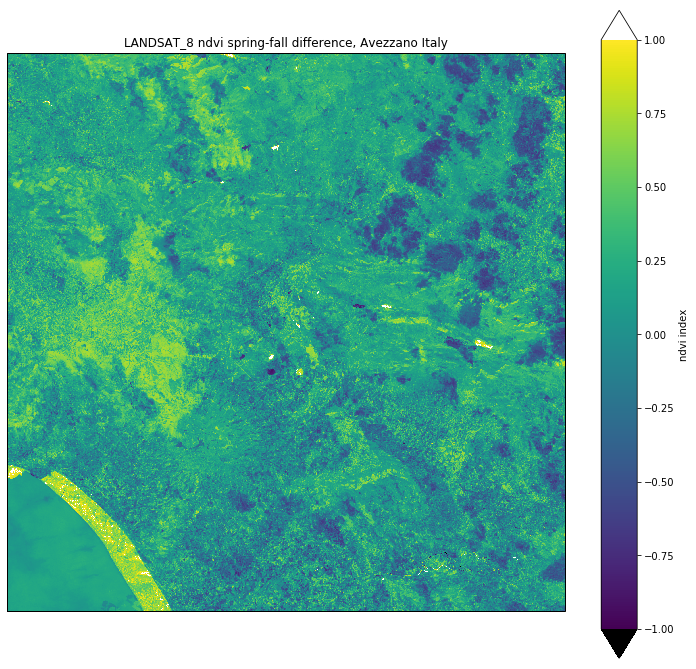

In [110]:
#CALC NDVI FOR EACH SEASON
for season in ['spring','fall']:
    nir = file_dict[season]['reflect']['nearir']
    red = file_dict[season]['reflect']['red']
    ndvi = (nir - red)/(nir + red)
    file_dict[season]['ndvi']=ndvi

#CALC DIFF
ndvi_diff = file_dict['spring']['ndvi'] - file_dict['fall']['ndvi']


#PLOT DIFFERENCE
vmin=-1
vmax=1
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)
palette='viridis'
pal = plt.get_cmap(palette)
pal.set_bad('0.75') #75% grey for out-of-map cells
pal.set_over('w')  #color cells > vmax red
pal.set_under('k')  #color cells < vmin black
fig, ax = plt.subplots(1, 1,figsize=[10,15],
                       subplot_kw={'projection': crs})
col=ax.imshow(ndvi_diff,origin="upper",
         extent=extent,transform=crs,norm=the_norm)
# ax.plot(ul_x,ul_y,'ro',markersize=50)
# ax.plot(lr_x,lr_y,'wo',markersize=50)
ax.set(title=f"{satellite} ndvi spring-fall difference, Avezzano Italy")
cbar_ax = fig.add_axes([0.95, 0.2, 0.05, 0.6])
cbar=ax.figure.colorbar(col,extend='both',cax=cbar_ax,orientation='vertical')
cbar.set_label('ndvi index')
### END SOLUTION

# NDVI checks -- get some statistics

These cells give you a sanity check on your subscene selection.  Is your spring ndvi bigger than your fall?

In [111]:
for season in ['spring','fall']:
    ndvi=file_dict[season]['ndvi']
    print(f'mean ndvi for {season}= {np.nanmean(ndvi)}')
    print('-'*50)

mean ndvi for spring= 0.5744701623916626
--------------------------------------------------
mean ndvi for fall= 0.4583694040775299
--------------------------------------------------


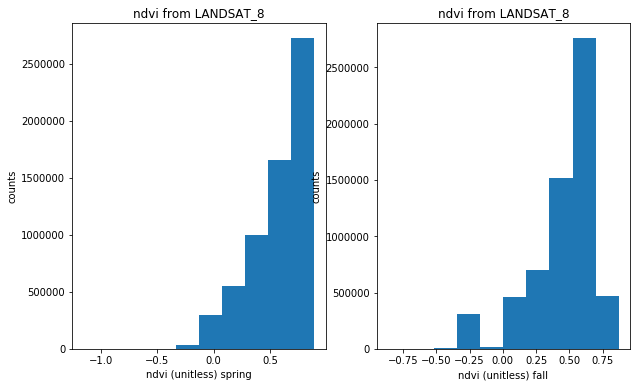

In [112]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
for the_ax,season in zip(axes,['spring','fall']):
    ndvi=file_dict[season]['ndvi']
    the_ax.hist(ndvi[~np.isnan(ndvi)].flat)
    the_ax.set_title(f'ndvi from {satellite}')
    the_ax.set(xlabel=f'ndvi (unitless) {season}',ylabel='counts');

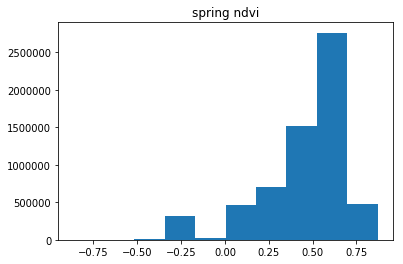

In [113]:
plt.hist(ndvi[~np.isnan(ndvi)].flat);
plt.title('spring ndvi')
plt.savefig('spring_ndvi.png')

# This cell reads in the thermal band and calculates the radiance

In [114]:
for season in ['spring','fall']:        
    key='thermal'        
    filepath=file_dict[season]['filenames'][key]
    bandnum=landsat_band_dict[key]
    with rasterio.open(filepath) as src:
        counts = src.read(1, window=small_window)
        counts=counts.astype(np.float32)
        counts[counts==0.]=np.nan
        thermal_rad = radiance_fun(counts,bandnum,metadata_string)
    file_dict[season]['thermal']=thermal_rad

Scene LC81900312017308LGN00 center time is 2017-11-04 09:47:29
Scene LC81900312017308LGN00 center time is 2017-11-04 09:47:29


# This cell histograms your spring/fall thermal radiances

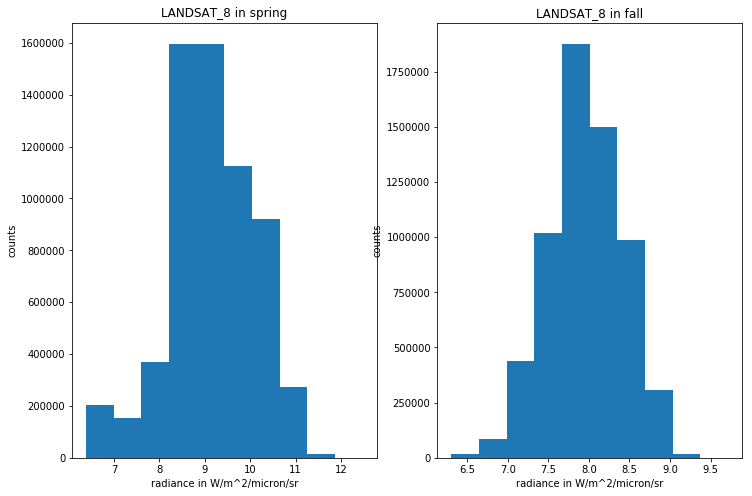

In [115]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
for index,season in enumerate(['spring','fall']):
    thermal_rad = file_dict[season]['thermal']
    ax[index].hist(thermal_rad[~np.isnan(thermal_rad)].flat)
    ax[index].set_title(f'{satellite} in {season}')
    ax[index].set(xlabel='radiance in W/m^2/micron/sr',ylabel='counts');

# Question D: calculate the brightness temperature

Referring back to:

https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/

Note from this link that landsat 7 and landsat 8 made different tradeoffs for their thermal channel.  Landsat 7 has two channel 6's with different channel ranges 6 [see this link](https://landsat.usgs.gov/why-are-there-two-thermal-band-6-files-landsat-7-data-i-downloaded) -- we are using 6.VCID_2 which has a narrower temperature range but finer intevals.  For Landsat 8, they instead split the thermal channel into two wavelength intervals, channel 10 and channel 11.  We are using channel 10 for landsat 8.  Also note that the Landsat 8 thermal channel has 100 meter pixels, while the Landsat 6 channel 6 has 60 meter pixels.  In both cases they are resampled to the same 30 meter grid as the reflectance channels, so pixels can be overlayed.


After this cell executes you should have two new entries in the file_dict:

    file_dict['spring']['btemp']
    file_dict['fall']['btemp']
    
And a plot of the fall brightness temperature for your thermal channel




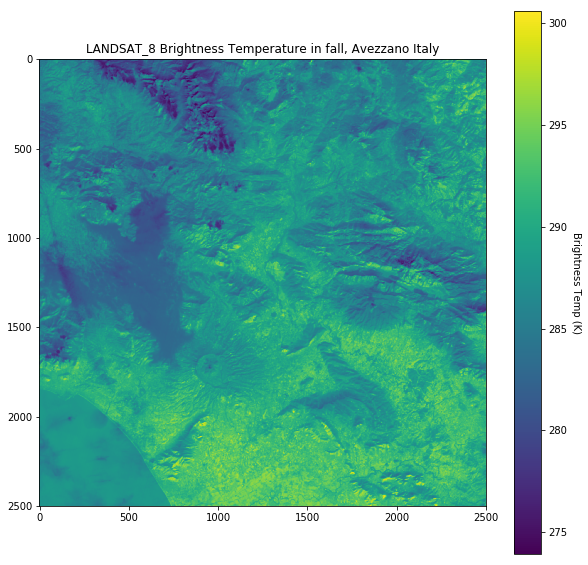

In [116]:
for season in ['spring','fall']:
    mks_radiance = (file_dict[season]['thermal'])*1.e6
    
    if landsat8:
        wavelength = 1.e-6*(10.6 + 11.19)/2.
    else:
        wavelength = 1.e-6*(10.40 + 12.50)/2.

    btemp= planck_invert(wavelength,mks_radiance)
    file_dict[season]['btemp'] = btemp
    
%matplotlib inline
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,10))
CS=ax.imshow(file_dict['fall']['btemp'])
cax=fig.colorbar(CS)
ax.set_title(f'{satellite} Brightness Temperature in fall, Avezzano Italy')
out=cax.ax.set_ylabel('Brightness Temp (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)

# Question E: highlight the ndvi in the coldest fall pixels

In the cell below:

1. Use numpy.quantile to find the T_25 quantile of your fall brightness temperature (i.e., find the temperature that is warmer than all but 25% of your pixels).   

2. Make a map of the fall ndvi for your coldest pixels by setting all pixels that are warmer than T_25 in your brightness temperature image to np.nan in your fall ndvi image.  The resulting map will show the status of vegetation in the coldest part of your scene during the winter

285.41705322265625


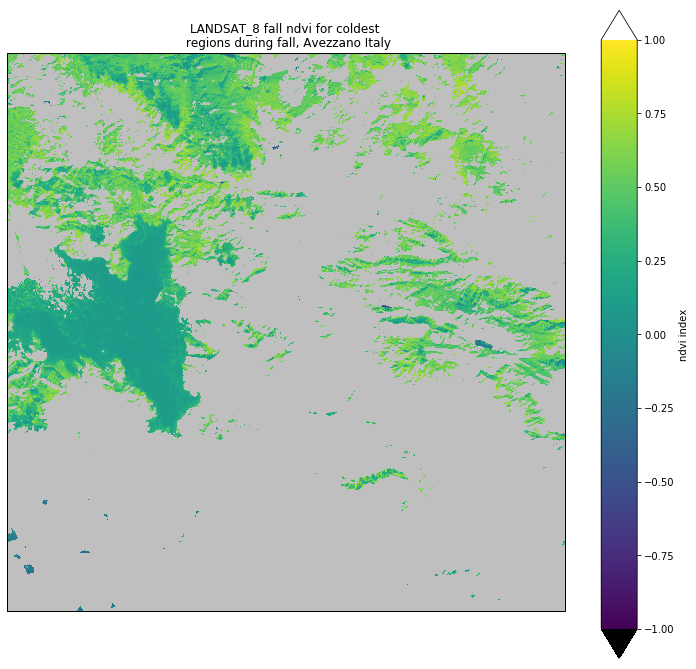

In [124]:
# this shell should use numpy.quantile to find the 25% threshold for your coldest fall temperaturs and
# then use that threshold to set all fall ndvi values at pixels warmer than that to np.nan.  The 
# code should plot a map of the fall ndvi for those cold pixels using ax.imshow for your UTM crs.
#
import numpy.ma as ma
T_25 = np.nanquantile(btemps,0.25)
print(T_25)
btemps = file_dict['fall']['btemp']
flat_pix = btemps.flatten('C')
mask_temp = flat_pix < T_25
fall_ndvi = file_dict['fall']['ndvi']
flat_ndvi = fall_ndvi.flatten('C')
cold_temps = np.where(mask_temp, flat_pix, np.nan)
cold_indices = np.where(np.isnan(cold_temps))
np.put(flat_ndvi, cold_indices[0], np.nan,mode='raise')
recast_ndvi = flat_ndvi.reshape((2500,2500), order='C')
recast_ndvi.shape


vmin=-1
vmax=1
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)
palette='viridis'
pal = plt.get_cmap(palette)
pal.set_bad('0.75') #75% grey for out-of-map cells
pal.set_over('w')  #color cells > vmax red
pal.set_under('k')  #color cells < vmin black
fig, ax = plt.subplots(1, 1,figsize=[10,15],
                       subplot_kw={'projection': crs})
col=ax.imshow(recast_ndvi,origin="upper",
         extent=extent,transform=crs,norm=the_norm)
# ax.plot(ul_x,ul_y,'ro',markersize=50)
# ax.plot(lr_x,lr_y,'wo',markersize=50)
ax.set(title=f"{satellite} {season} ndvi for coldest \n regions during fall, Avezzano Italy")
cbar_ax = fig.add_axes([0.95, 0.2, 0.05, 0.6])
cbar=ax.figure.colorbar(col,extend='both',cax=cbar_ax,orientation='vertical')
cbar.set_label('ndvi index')
# ### END SOLUTION

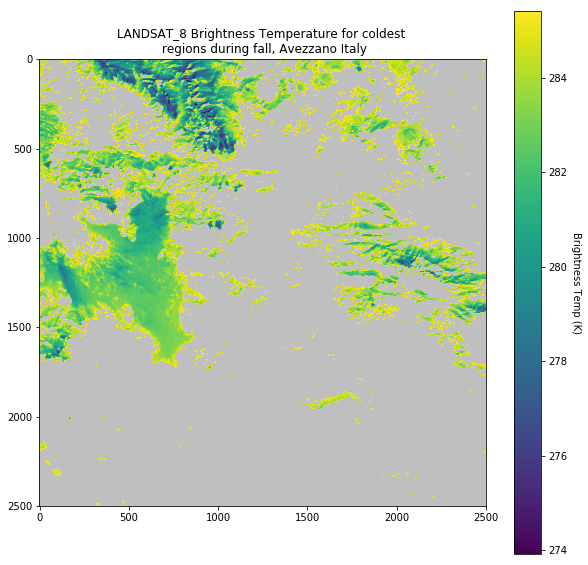

In [123]:
#CHECKING TO CONFIRM REGION WITH COLDEST TEMPERATURE MATCHES FOR THE NDVI PLOT ABOVE

recast_temp = cold_temps.reshape((2500,2500), order='C')

%matplotlib inline
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,10))
CS=ax.imshow(recast_temp)
cax=fig.colorbar(CS)
ax.set_title(f'{satellite} Brightness Temperature for coldest \n regions during fall, Avezzano Italy')
out=cax.ax.set_ylabel('Brightness Temp (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)